In [15]:
# Attempt at blob detection in 3d images
import skimage as sk
import numpy as np
from skimage import io
from skimage import feature
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

img_file = '/Users/jwilmot/Desktop/SampleGFP.tif'
img_raw = sk.io.imread(img_file)

In [12]:
# takes image, min_sigma (affects minimum cell size found), max_sigma (affects max cell size found),
# threshold (affects how bright cells must be to be detected)
def detect_blobs_3dlog(image, min_sigma=10, max_sigma=20, threshold=.003):
    for i in range(len(image)):
        # the if statement is necessary to create the proper array on the first iteration
        if i == 0:
            log_cells = sk.feature.blob_log(image[0,:,:], min_sigma = min_sigma,
                                                        max_sigma = max_sigma, threshold = threshold)
        else:
            log_cells = np.append(log_cells, sk.feature.blob_log(image[i,:,:], min_sigma = min_sigma,
                                                        max_sigma = max_sigma, threshold = threshold), axis = 0)
    return log_cells

def plot_blobs_ns(blobs, color, size_mod):
    for blob in blobs:
        y, x, size = blob
        c = plt.Circle((x, y), size*size_mod, color=color, linewidth=2)
        ax.add_patch(c)
        

In [13]:
cells = detect_blobs_3dlog(img_raw)

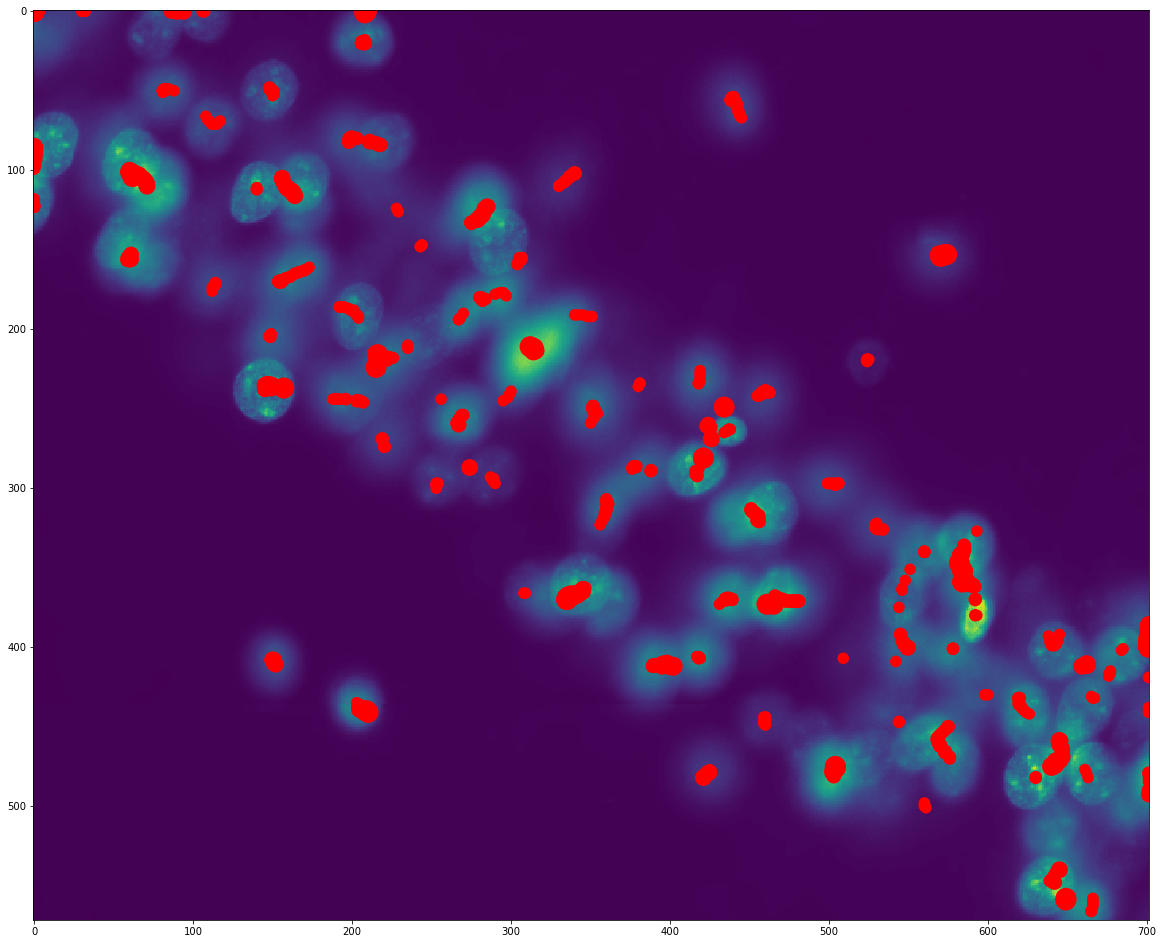

In [16]:
f, ax = plt.subplots(1, figsize = (20,20))
plt.imshow(img_raw[10, :, :])
plot_blobs_ns(cells, 'r', .3)

In [49]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial import distance as dist
import scipy.cluster.hierarchy as hier


coordinates = pd.DataFrame(cells[:,[0,1]], columns = ['y', 'x'])

dist_mat = dist.squareform(dist.pdist(coordinates.values))
link_mat = hier.linkage(dist_mat)
cluster_idx = hier.fcluster(link_mat, 90,
                            criterion='distance')
coordinates['new_label'] = cluster_idx
coordinates.set_index('new_label', drop=True, append=False, inplace=True)
coordinates.index.name = 'label'
coordinates = coordinates.sort_index()


/Users/jwilmot/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


In [50]:
def df_average(df, weights_column):
    '''Computes the average on each columns of a dataframe, weighted
    by the values of the column `weight_columns`.
    
    Parameters:
    -----------
    df: a pandas DataFrame instance
    weights_column: a string, the column name of the weights column 
    
    Returns:
    --------
    
    values: pandas DataFrame instance with the same column names as `df`
        with the weighted average value of the column
    '''
    
    values = df.copy().iloc[0]
    norm = df[weights_column].sum()
    for col in df.columns:
        try:
            v = (df[col] * df[weights_column]).sum() / norm
        except TypeError:
            v = df[col].iloc[0]
        values[col] = v
    return values

In [51]:
cell_positions = coordinates.groupby(level='label').mean()
cell_positions

,y,x
label,,
1,409.000000,150.733333
2,437.933333,204.933333
3,57.933333,440.533333
4,152.916667,569.666667
5,219.222222,524.111111
6,121.222222,0.000000
7,88.933333,0.000000
8,0.000000,0.000000
9,0.000000,31.285714


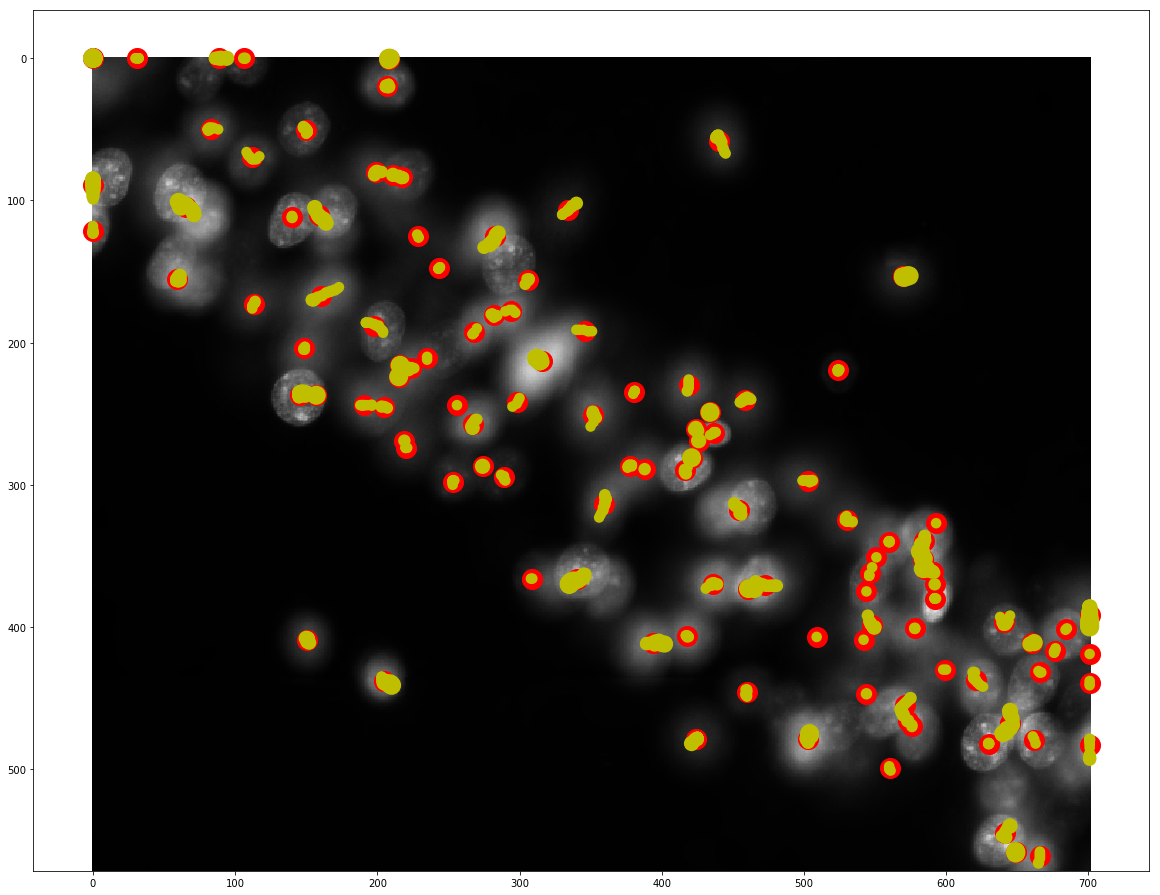

In [60]:
f, ax = plt.subplots(1, figsize = (20,20))
plt.imshow(img_raw[10,:,:], cmap = "gray")
plt.scatter(cell_positions['x'], cell_positions['y'], s= 400, c = 'r')
plot_blobs_ns(cells, 'y', .3)